In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import GradientTape, expand_dims
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from AHCON_T import *
from Game import *
#from Q8_1 import *
from Vis import *
import time

In [50]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [51]:
import os
parquet_ls_names = []
for filename in os.listdir("./Erbegnis/"):
    if filename[-7:]=="parquet":
        parquet_ls_names.append(filename)

In [52]:
parquet_ls_names

['rounds=20,temperature_l=None,food_pos_list=train_f_slice.parquet',
 'rounds=20,temperature_l=None,teaching=False,prio=False_off_policy.parquet',
 'rounds=20,temperature_l=None,teaching=True,prio=True,pl=0.01.parquet',
 'rounds=20,temperature_l=None,teaching=False,prio=True,pl=0.01.parquet',
 'rounds=20,temperature_l=None,teaching=False,prio=False,pl=0.01.parquet']

In [53]:
list_df = []
for filename in parquet_ls_names:
    list_df.append(pd.read_parquet("./Erbegnis/"+filename))

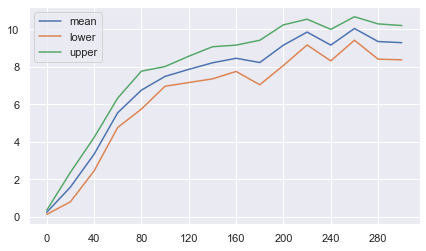

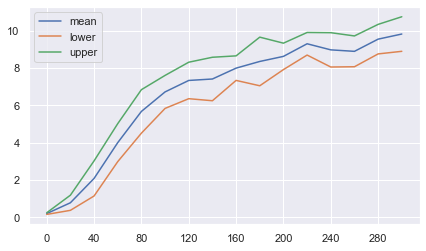

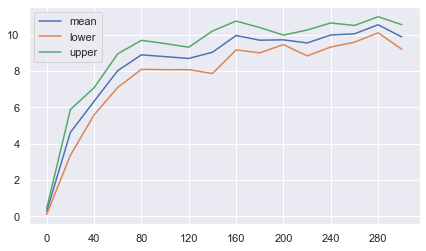

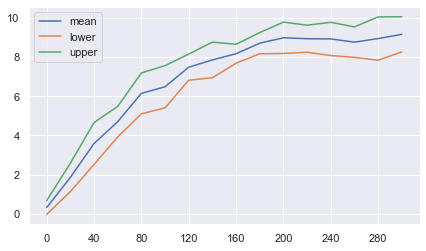

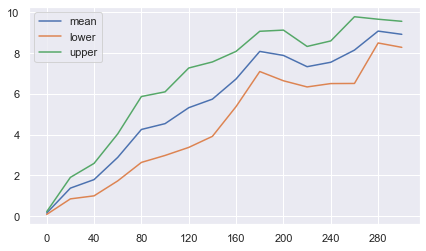

In [54]:
for df in list_df:
    pd.DataFrame(df.apply(mean_confidence_interval,axis=0).to_list(),index=df.columns, columns=['mean','lower','upper']).plot()

In [55]:
df= list_df[0]

In [56]:
df

,0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300
0,0.30,0.34,3.02,4.88,6.02,7.62,7.52,6.96,6.04,8.44,7.40,10.00,7.40,9.68,7.30,9.62
1,0.30,0.88,2.56,4.92,6.22,6.80,7.80,8.88,8.02,9.06,10.00,9.98,9.98,10.92,9.92,11.10
2,0.50,2.14,2.38,6.38,6.02,7.16,6.38,7.82,8.52,9.52,11.36,11.18,10.32,9.34,9.66,7.36
3,0.04,2.32,4.06,5.24,8.32,7.68,7.70,9.78,9.34,6.12,6.90,8.14,7.74,10.66,11.16,8.28
4,0.44,3.80,3.88,7.42,8.80,8.70,9.28,10.42,8.18,8.42,10.66,9.78,7.86,11.00,7.06,8.98
5,0.10,1.82,2.84,5.32,5.96,7.84,7.78,8.16,9.14,6.54,7.62,10.90,9.98,9.46,9.60,8.76
6,0.24,1.22,1.66,4.68,7.76,8.50,8.00,7.70,9.10,8.30,9.82,10.42,9.80,8.62,9.06,10.40
7,0.16,2.28,5.34,4.48,4.66,6.48,6.54,7.78,8.42,10.36,10.18,8.40,8.82,9.36,10.82,10.62
8,0.32,0.24,2.42,4.88,8.32,6.74,8.26,6.50,8.42,5.54,8.34,9.72,9.00,11.20,9.26,10.08
9,0.06,0.86,5.24,7.36,5.52,7.40,9.40,8.16,9.40,10.02,9.30,10.02,10.70,10.22,9.66,7.70


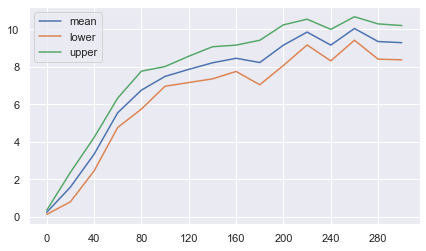

In [57]:
pd.DataFrame(df.apply(mean_confidence_interval,axis=0).to_list(),index=df.columns, columns=['mean','lower','upper']).plot()

In [58]:
paper_ahcon = [0.5,1.1,2.3,4,5,7,7.5,8,8,9,9.5,9,9,9.2,10,9.2]
paper_ahcon_r = [0.5,3.5,6,8,8,8.5,9,8.8,8.8,9.2,9.5,9.2,9.1,9,9.2,9.2]
paper_ahcon_t = [0.5,4,7,8,7.5,9,9,9.4,9.7,9.2,10.2,9.8,10,10,9.8,9.5]

In [59]:
len(paper_ahcon_t)

16

In [60]:
names = ['AHCON','AHCON-R','AHCON-T prio','AHCON-R prio', 'AHCON-R on policy']
names_paper = ['AHCON','AHCON-R','AHCON-T','AHCON-R', 'AHCON-R']

In [61]:
df_auswertung = pd.DataFrame(columns= names)
for i in range(5):
    df_auswertung[names[i]] = list_df[i].mean()

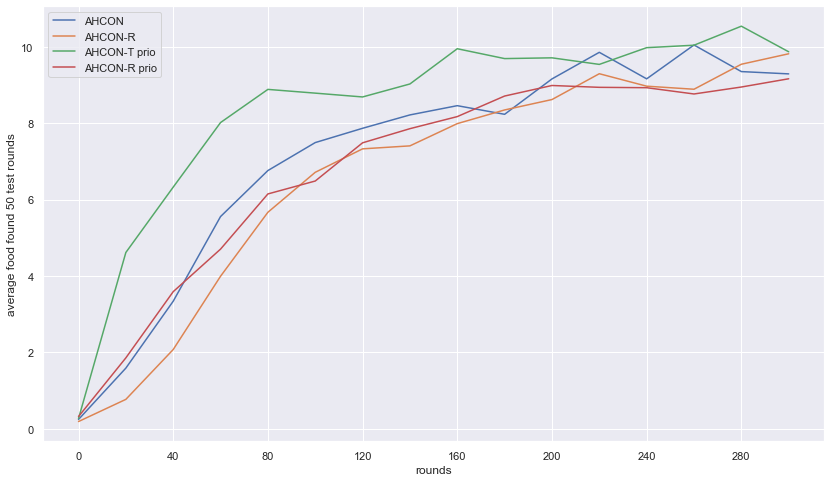

In [62]:
sns.set(rc={'figure.figsize':(14,8)})

df_auswertung[['AHCON','AHCON-R','AHCON-T prio','AHCON-R prio']].plot()

plt.xlabel('rounds')
plt.ylabel('average food found 50 test rounds')
plt.savefig("./Erbegnis/all")

In [63]:
df_auswertung

,AHCON,AHCON-R,AHCON-T prio,AHCON-R prio,AHCON-R on policy
0,0.246,0.192,0.270,0.322,0.158
20,1.590,0.772,4.616,1.858,1.380
40,3.340,2.076,6.326,3.590,1.798
60,5.556,3.994,8.016,4.704,2.888
80,6.760,5.668,8.884,6.148,4.258
100,7.492,6.714,8.786,6.486,4.544
120,7.866,7.328,8.686,7.486,5.326
140,8.216,7.406,9.026,7.856,5.746
160,8.458,7.988,9.948,8.172,6.736
180,8.232,8.346,9.690,8.710,8.088


In [64]:
df_auswertung['AHCON paper'] = paper_ahcon

In [65]:
df_auswertung['AHCON-R paper'] = paper_ahcon_r

In [66]:
df_auswertung['AHCON-T paper'] = paper_ahcon_t

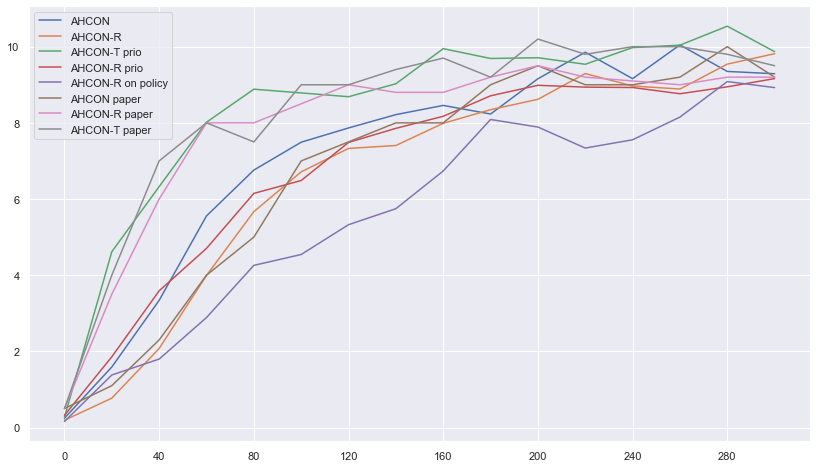

In [67]:
df_auswertung.plot()

In [68]:
df_einzelauswertungen_list = [[list_df[0],paper_ahcon],[list_df[1],paper_ahcon_r],[list_df[2],paper_ahcon_t],[list_df[3],paper_ahcon_r],[list_df[4],paper_ahcon_r]]

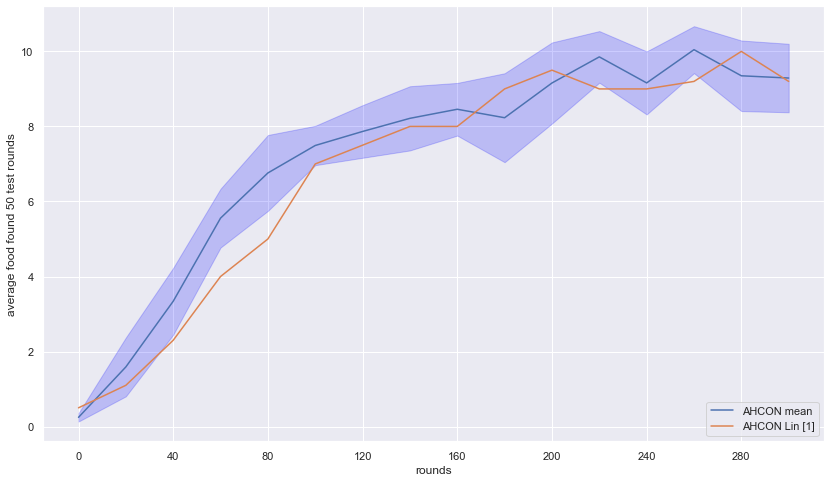

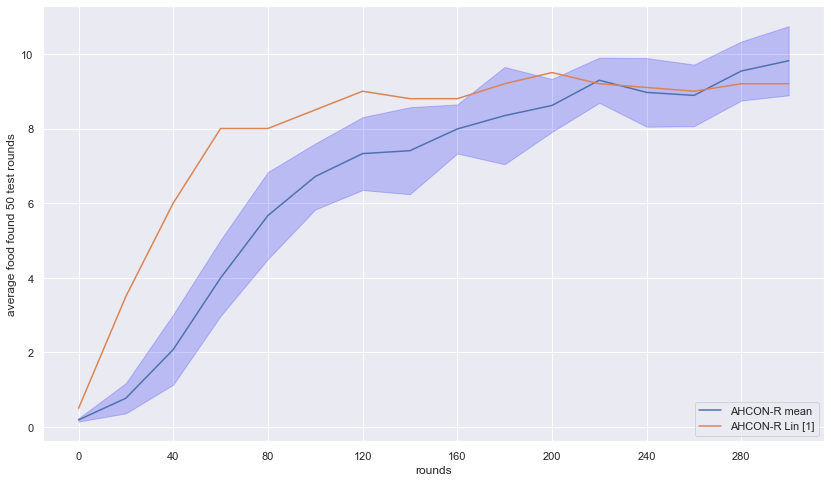

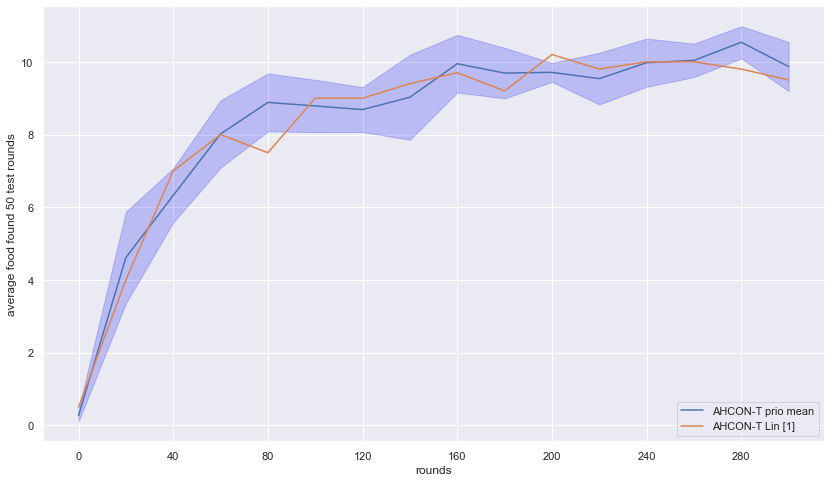

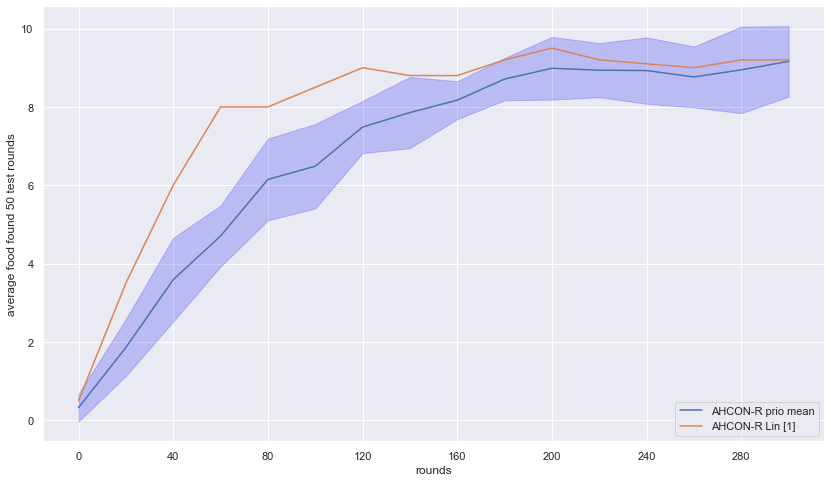

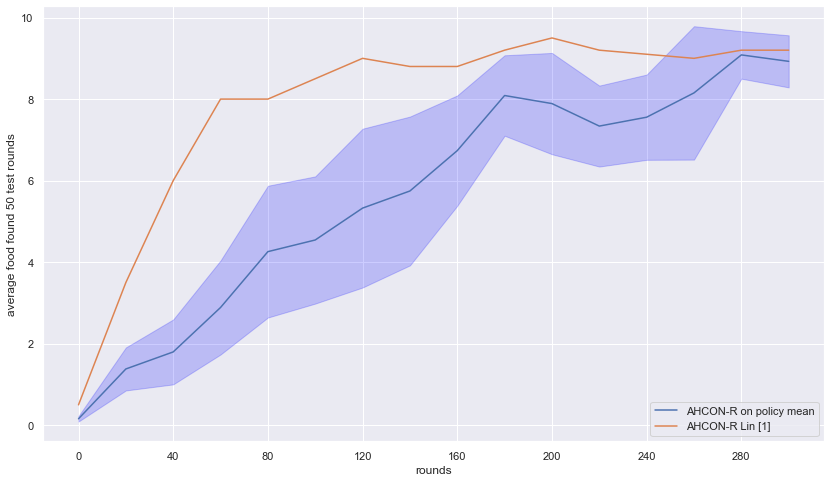

In [69]:
sns.set(rc={'figure.figsize':(14,8)})
for i in range(5):
    df, paper = df_einzelauswertungen_list[i]
    df_plot = pd.DataFrame(df.apply(mean_confidence_interval,axis=0).to_list(),index=df.columns, columns=['mean','lower','upper'])
    df_plot['paper'] = paper
    
    df_plot.columns = [names[i]+ " " + c for c in df_plot.columns]
    df_plot.rename(columns={ df_plot.columns[-1]: names_paper[i]+" Lin [1]" }, inplace = True)
    df_plot.iloc[:,[0,3]].plot()
    
    plt.xlabel('rounds')
    plt.ylabel('average food found 50 test rounds')
    plt.legend(loc='lower right')
    plt.fill_between(np.array(range(0,301,20)).astype(str),df_plot.iloc[:,1],df_plot.iloc[:,2],color='blue',alpha=0.2)
    plt.savefig("./Erbegnis/"+df_plot.columns[0])

In [93]:
df_plot.index.astype(int)

Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
            280, 300],
           dtype='int64')

In [94]:
for i in range(len(list_df)):
    df = list_df[i]
    print(names[i])
    print("mean: ",df.mean(axis=0).round(3).to_list())
    print("min: ", df.min(axis=0).to_list())
    print("max: ",df.max(axis=0).to_list())

AHCON
mean:  [0.246, 1.59, 3.34, 5.556, 6.76, 7.492, 7.866, 8.216, 8.458, 8.232, 9.158, 9.854, 9.16, 10.046, 9.35, 9.29]
min:  [0.04, 0.24, 1.66, 4.48, 4.66, 6.48, 6.38, 6.5, 6.04, 5.54, 6.9, 8.14, 7.4, 8.62, 7.06, 7.36]
max:  [0.5, 3.8, 5.34, 7.42, 8.8, 8.7, 9.4, 10.42, 9.4, 10.36, 11.36, 11.18, 10.7, 11.2, 11.16, 11.1]
AHCON-R
mean:  [0.192, 0.772, 2.076, 3.994, 5.668, 6.714, 7.328, 7.406, 7.988, 8.346, 8.618, 9.294, 8.968, 8.888, 9.542, 9.816]
min:  [0.14, 0.04, 0.36, 1.28, 3.18, 4.78, 4.44, 4.0, 6.46, 5.1, 7.14, 8.28, 7.26, 6.52, 7.16, 6.72]
max:  [0.34, 1.6, 3.8, 6.3, 7.92, 8.22, 8.72, 10.16, 9.34, 10.44, 10.0, 10.8, 10.96, 10.2, 10.82, 11.1]
AHCON-T prio
mean:  [0.27, 4.616, 6.326, 8.016, 8.884, 8.786, 8.686, 9.026, 9.948, 9.69, 9.71, 9.538, 9.976, 10.04, 10.538, 9.868]
min:  [0.02, 2.36, 4.54, 4.98, 7.6, 7.04, 7.32, 4.9, 8.02, 7.82, 9.18, 7.86, 8.22, 9.26, 9.74, 7.92]
max:  [0.72, 7.96, 7.72, 9.36, 11.56, 9.76, 9.98, 10.62, 11.46, 11.06, 10.12, 10.74, 11.38, 11.16, 11.66, 11.16]

In [95]:
df.mean(axis=0)

0      0.158
20     1.380
40     1.798
60     2.888
80     4.258
100    4.544
120    5.326
140    5.746
160    6.736
180    8.088
200    7.890
220    7.338
240    7.556
260    8.152
280    9.084
300    8.926
dtype: float64

In [3]:
agent1 = AHCON_Agent(eta_e=0.001,eta_p=0.001, discount_factor=0.9,H_e= 30, H_p= 30 , board=game(reinforcement_natural_death=-1),eval_n="./Ergebnis/eval",policy_n="./Ergebnis/policy")

In [15]:
test_ergebnis = agent1.analyse_run(1000)

In [16]:
unique , counts = np.unique(test_ergebnis[2],return_counts=True)

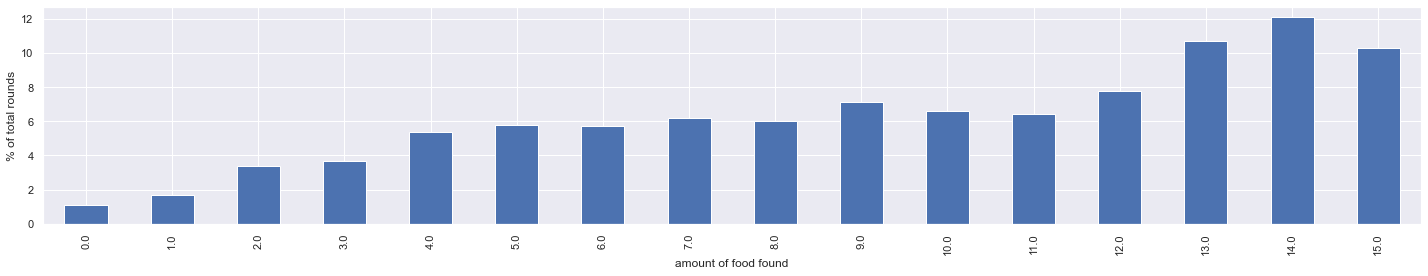

In [17]:
sns.set(rc={'figure.figsize':(20,4)})
pd.DataFrame(data= counts/10, index = unique).plot(kind='bar',legend=None)
plt.ylabel('% of total rounds')
plt.xlabel('amount of food found')
plt.tight_layout()
plt.savefig("./Erbegnis/ff")

In [108]:
test_ergebnis[2].mean()

9.226

In [9]:
runs = []
ff=0
while(ff<15):
    ff, vis = agent1.run()
    print(ff)

3
12
13
9
15


In [6]:
ff

15

In [10]:
vis2 = Visual(vis)
vis2.visualize()

In [14]:
agent1.analyse_run(1)

(array([-0.99871871]), array([0.]), array([14.]), array([0.]), [[]])

In [ ]:
analyse_run

In [19]:
test_ergebnis[3]

array([  0.,  73.,   0.,  33.,   0.,  41.,   0.,   0.,  49.,  71.,  77.,
       107., 103.,  56.,  41.,   0.,   0.,   0.,  79.,  89.,  83.,  38.,
       106.,  54.,  79.,   0.,  40.,  59., 116.,  30.,  64.,   0.,  56.,
         5.,   0.,   0.,  38.,   0.,  76.,  28.,  22.,  55.,  52.,   0.,
        62.,   0.,  89.,   0.,  94.,  60.,  76.,  24.,  56.,  29.,   0.,
         0.,  74.,  75.,   3.,   0.,  63.,   0.,  33.,  62., 106.,   0.,
        48.,  48.,   0.,   0.,  32., 114.,  91.,   0., 120.,  41.,  12.,
         0.,   0., 102.,  52.,   0.,   0.,   0.,  25.,  43.,  86.,   0.,
         0.,  87.,  44.,   0.,  21.,  79.,  52.,  85.,  49.,  29.,  94.,
       112.,   0.,  76.,  59.,  75.,   0.,   0.,   0.,  50.,   0.,  45.,
        38.,  53.,   0.,  91.,  50.,  58.,  75.,   0.,   0.,   0.,  63.,
         0.,   0.,   0.,   0.,   0.,  90.,  99.,   0.,  55.,  34.,   0.,
        38.,   0.,  59.,   0.,   0.,   0.,   0.,  76.,   0.,  48.,  55.,
         0.,   0.,  14.,  73.,   0.,  65.,  16.,   

In [25]:
unique , counts = np.unique(test_ergebnis[3][test_ergebnis[2]!=15],return_counts=True)

In [27]:
counts[unique==0 ].sum()

323

In [28]:
counts[unique!=0].sum()

574

In [29]:
(test_ergebnis[2]==15).sum()

103